<a href="https://colab.research.google.com/github/SahilCarterr/Impainting-Diffusers/blob/update_code/yolo_custom_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d nguyngiabol/colorful-fashion-dataset-for-object-detection

In [ ]:
!unzip colorful-fashion-dataset-for-object-detection.zip

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 10.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob

In [5]:
# Check GPU is working or not
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.2.1+cu121 (NVIDIA L4)


In [17]:
image_path = "/content/colorful_fashion_dataset_for_object_detection/JPEGImages"
annotations_path = "/content/colorful_fashion_dataset_for_object_detection/Annotations_txt"
path= "/content/colorful_fashion_dataset_for_object_detection"

In [7]:
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 328MB/s]


WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'line_width' instead.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.



100%|██████████| 151k/151k [00:00<00:00, 10.4MB/s]


image 1/1 /content/GRdCC.jpg: 448x640 1 person, 1 bicycle, 5 cars, 1 truck, 163.8ms
Speed: 13.3ms preprocess, 163.8ms inference, 2917.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


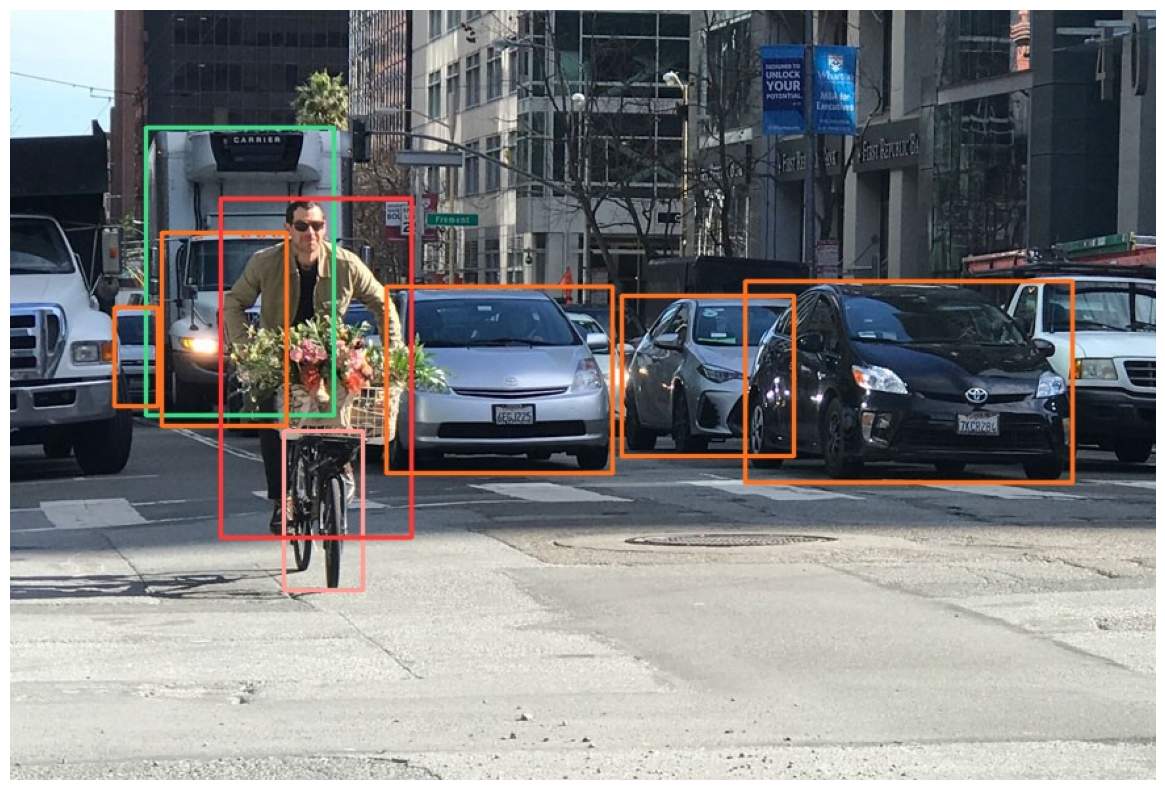

In [8]:
# choose random image
img = random.choice(os.listdir(image_path))

i=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True, line_thickness=2, hide_labels=False)

im = plt.imread('/content/runs/detect/predict/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)

In [9]:
#get coordinates of boxes
boxes = i[0].boxes
boxes=boxes.xyxy
print(boxes)

tensor([[559.4876, 206.4729, 808.0990, 359.3831],
        [465.4996, 217.2014, 596.3989, 339.3232],
        [286.4722, 210.6111, 458.3813, 352.5552],
        [160.5003, 143.5390, 305.4831, 401.9420],
        [ 79.5512, 226.0520, 112.4053, 301.5862],
        [115.0342, 169.5398, 210.1108, 316.1550],
        [103.4707,  89.5481, 246.7670, 308.3156],
        [208.5795, 320.9810, 268.2911, 441.3831]], device='cuda:0')


In [10]:
#print first row of boxes.xyxy
print(boxes[0])

tensor([559.4876, 206.4729, 808.0990, 359.3831], device='cuda:0')


In [11]:
from PIL import Image
img=Image.open("/content/GRdCC.jpg")

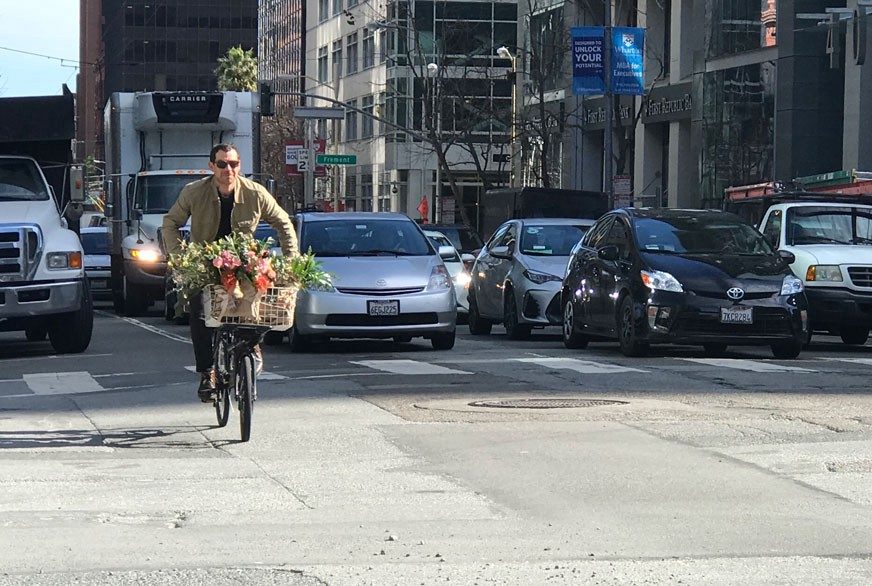

In [12]:
img

In [13]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+"/"+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])

            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

In [14]:
from pathlib import Path
image_path=Path(image_path)
annotations_path=Path("/content/colorful_fashion_dataset_for_object_detection/Annotations_txt")
annotation_dir=Path(annotations_path)

In [15]:
import random
random_path=random.sample(list(image_path.glob('*')),10)


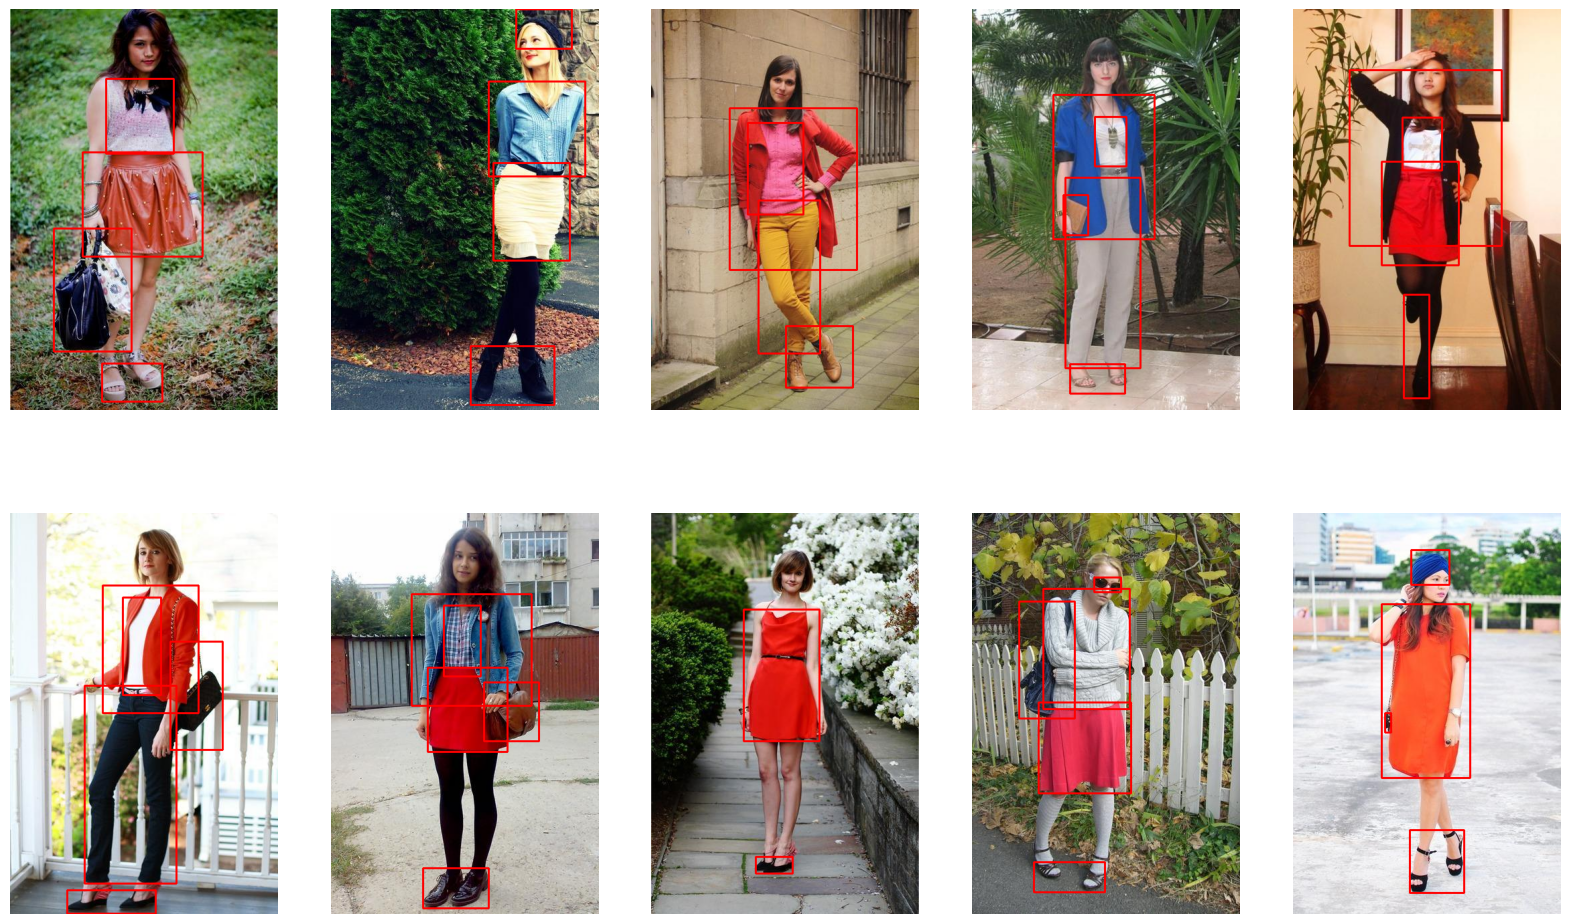

In [18]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(image_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(image_path+"/"+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

In [19]:
train = []
with open(path+"/"+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+"/"+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [20]:
len(train), len(test)

(2145, 537)

In [21]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [22]:
train_path = '/content/train'
test_path = '/content/test'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(image_path+"/"+i+'.jpg', train_path+"/"+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+"/"+i+'.txt', train_path+"/"+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(image_path+"/"+i+'.jpg', test_path+"/"+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+"/"+i+'.txt', test_path+"/"+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:00<00:00, 4992.98it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:00<00:00, 5058.22it/s]


In [23]:
text = """
train: /content/train
val: /content/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [24]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=10)

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 124MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 1321.91it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 1085.63it/s]


val: New cache created: /content/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.01G      1.322      2.039      1.459          3        640: 100%|██████████| 135/135 [00:45<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]

                   all        537       2035      0.632      0.673      0.672      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.86G      1.286      1.329      1.407          5        640: 100%|██████████| 135/135 [00:41<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.37it/s]


                   all        537       2035      0.572      0.664      0.656      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.89G      1.298      1.281      1.414          2        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.37it/s]


                   all        537       2035      0.587      0.668      0.646      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.87G      1.263      1.191      1.403          5        640: 100%|██████████| 135/135 [00:40<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.35it/s]


                   all        537       2035      0.639      0.684      0.694      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      6.89G      1.218      1.079      1.353          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.36it/s]


                   all        537       2035      0.653      0.726      0.726      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.88G      1.168     0.9974      1.326          5        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.32it/s]


                   all        537       2035      0.698      0.742      0.748      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.88G      1.144      0.927       1.31          2        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.35it/s]


                   all        537       2035      0.714      0.743      0.764      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.87G      1.092     0.8504       1.27          6        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]


                   all        537       2035      0.729       0.74      0.761      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.88G      1.061     0.7811      1.256          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]


                   all        537       2035       0.72      0.769      0.784      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.88G     0.9969     0.7365      1.222          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.42it/s]


                   all        537       2035      0.741      0.778      0.791      0.548

10 epochs completed in 0.131 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


                   all        537       2035      0.741      0.778      0.791      0.548
              sunglass        537         82      0.736      0.183      0.347      0.127
                   hat        537         77       0.73      0.844      0.857      0.523
                jacket        537        181      0.737      0.823      0.865       0.68
                 shirt        537        366      0.753      0.866      0.862       0.63
                 pants        537        114      0.866      0.912      0.957      0.764
                shorts        537        107      0.766      0.854      0.832      0.548
                 skirt        537        186      0.741      0.844      0.823      0.654
                 dress        537        128      0.612      0.867      0.782      0.641
                   bag        537        274      0.699      0.763       0.76      0.435
                  shoe        537        520      0.773      0.827      0.829      0.478
Speed: 0.3ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2e5807bb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [27]:
#save model
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
new_model=YOLO('/content/runs/detect/train/weights/best.pt')

In [114]:
import shutil
#remove a file
shutil.rmtree('/content/runs/detect/train5')

In [ ]:
# choose random image from dataset
#os.makedirs('/content/runs/detect/predict2', exist_ok=True)
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(image_path), 6)
c=2
for img in imgs:
    i=model.predict(source=image_path+"/"+img, conf=0.4, save=True, line_thickness=2)

In [145]:
model_loaded=YOLO('/content/runs/detect/train/weights/best.pt')

## Segmenatation model testing

In [14]:

import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   232MB/s    in 14s     

2024-05-01 05:08:37 (170 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [16]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([255, 255, 255, 1.0])
    #fig = plt.figure()

    # Set the background color to black
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    plt.axis("off")
    ax.imshow(mask_image)
    plt.savefig('mask.png')



def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

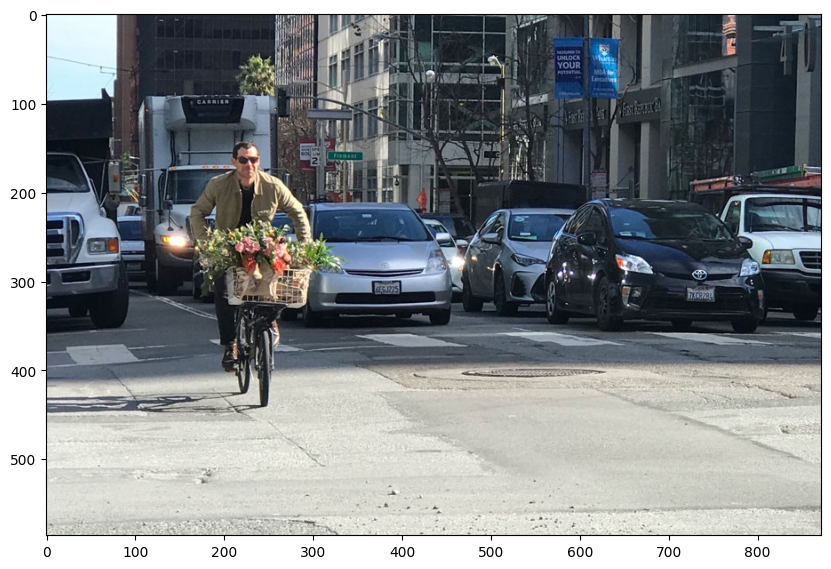

In [17]:
image = cv2.imread('/content/GRdCC.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [18]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [19]:
predictor.set_image(image)

In [20]:
boxes[0]

tensor([559.4828, 206.4752, 808.1014, 359.3812], device='cuda:0')

In [22]:
input_box = np.array(boxes[0].cpu())

In [23]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

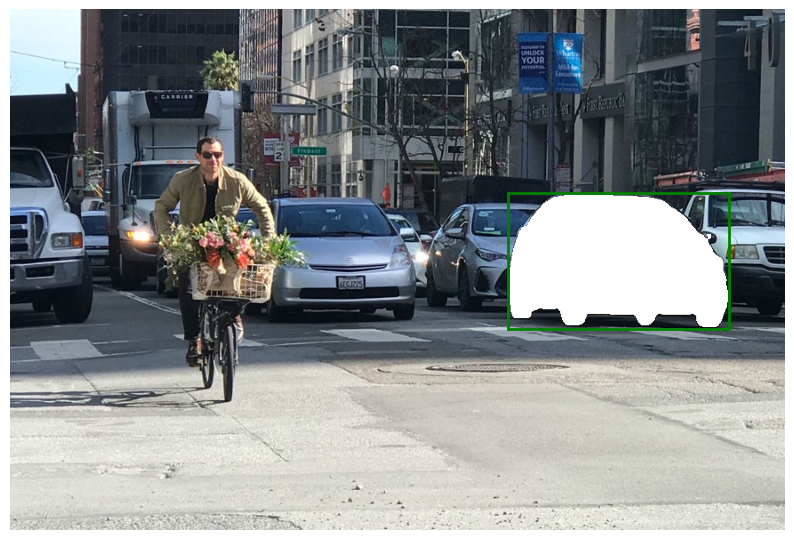

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show();